In [2]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
import ast
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])


In [4]:
df_exploded = df.explode('job_skills')

In [5]:
skills_count=df_exploded.groupby(['job_title_short','job_skills']).size().reset_index(name='count')
skills_count

,job_title_short,job_skills,count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [6]:
job_title='Data Analyst'
top=10
top_skills = skills_count[skills_count['job_title_short'] == job_title].sort_values(by='count',ascending=False).head(top)


In [7]:
top_skills

,job_title_short,job_skills,count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


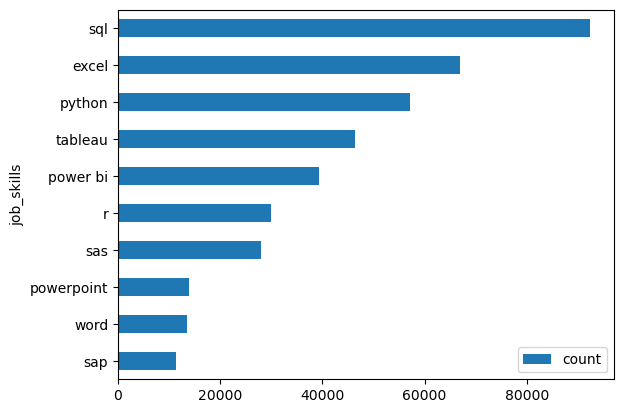

In [8]:
top_skills.plot(kind='barh', x='job_skills',y='count').invert_yaxis()